## Agent 

Agent는 행동하는 존재이며, 행동(act)이란 단어는 보이는 의미 이상의 함축된 내용을 담고 있다

- Agent LLM 애플리케이션은 LLM을 활용해 현재 상태나 바람직한 차기 상태에 관한 일정한 컨텍스트를 바탕으로 두 가지 이상의 행동 중에서 선택해야 한다. 
    - `tool` 호출: 프롬프트에 LLM이 활용할 수 있는 외부 함수 목록을 포함하고, 생성된 출력에서 선택을 어떤 형식으로 표기할지 지침을 제공
    - `CoT`: 연구 결과나 복잡한 문제를 구체적인 단계로 세분화하여 프롬프트를 순차적으로 진행하며 LLM이 보다 나은 결정을 내리도록 만들 수 있음. 

In [1]:
!pip install duckduckgo-search

   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ----------------------- ---------------- 2.4/4.0 MB 13.4 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 12.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 3.1/3.1 MB 23.1 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [lxml]
   ------------- -------------------------- 1/3 [lxml]
   ---------------------------------------- 3/3 [duckduckgo-search]



## LangGraph Agent

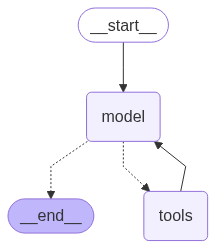

In [ ]:
import ast 
from typing import Annotated, TypedDict

from langchain_community.tools import DuckDuckGoSearchRun
from langchain_core.messages import HumanMessage
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from langgraph.graph import START, StateGraph
from langgraph.graph.message import add_messages # reducer function
# ToolNode는 상태에 기록된 최신 AI messages에서 요청된 tool를 실행한 후 각 호출 결과를 담은 ToolMessages를 반환 
from langgraph.prebuilt import ToolNode, tools_condition
from dotenv import load_dotenv

load_dotenv("../../.env")

@tool
def calculator(query: str) -> str:
    '''계산기. 수식만 입력받음'''
    return ast.literal_eval(query)

search = DuckDuckGoSearchRun() # 검색 툴 정의 
tools = [search, calculator]
model = ChatOpenAI(
    model = 'gpt-4o-mini',
    temperature = 0.1
).bind_tools(tools) 

class State(TypedDict):
    messages: Annotated[list, add_messages]
    
def model_node(state: State) -> State:
    res = model.invoke(state['messages'])
    return {'messages': res}

builder = StateGraph(State)
builder.add_node('model', model_node)
builder.add_node('tools', ToolNode(tools)) # ToolNode 자체적으로 예외를 처리 
builder.add_edge(START, 'model')
# 최신 AI Messages에서 사용된 Tools를 확인해보고 존재하면 tools 노드로 연결하는 조건부 엣지 함수 
builder.add_conditional_edges('model', tools_condition) 
builder.add_edge('tools', 'model')

graph = builder.compile()
graph

In [4]:
input = {
    'messages': [
        HumanMessage(
            '미국의 제30대 대통령이 사망했을 때 몇 살이었나요?'
        )
    ]
}

for c in graph.stream(input):
    print(c)

{'model': {'messages': AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_v77506stkRhTX8l89iOfWl2J', 'function': {'arguments': '{"query":"미국 제30대 대통령 사망 나이"}', 'name': 'duckduckgo_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 115, 'total_tokens': 141, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BzFkRtLZKVrI2BOWFpeXtcFCkKh85', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--720094b7-ced9-494f-8495-e856319b406d-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': '미국 제30대 대통령 사망 나이'}, 'id': 'call_v77506stkRhTX8l89iOfWl2J', 'type': 'tool_call'}], usage_metadata={'input_tokens': 115, 'output_

c:\Users\user\anaconda3\envs\ragenv\lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'tools': {'messages': [ToolMessage(content='Jul 10, 2025 · 역대 미국 대통령 에 대해서 명단과 함께 소개하는 문서. 한국과 달리 미국은 연임한 대통령의 경우 전체 임기를 한 대로 센다. 따라서 조지 워싱턴 은 한국의 대수 문화대로 표기하면 제1·2대 대통령이지만 미국의 방식에 따라서 … Jul 6, 2025 · 역대 최연소의 나이에 당선된 미국 대통령 [21] 이자, 최초의 가톨릭 신자 미국 대통령 [22] 이며, 미국 최초의 비 WASP 대통령이자, [23] 최초의 20세기 출생 대통령이기도 하다. Oct 26, 2024 · 1920년 대선에서 공화당의 워렌 하딩 대통령 후보의 부통령으로 선출된 쿨리지는 1923년 하딩 대통령의 갑작스러운 사망으로 미국의 30대 대통령이 됩니다. Feb 15, 2025 · 미국 47대 대통령 도널드 트럼프의 취임이후 많은 나라들이 그의 행보에 촉각을 세우고 대응하고 있습니다. 막강한 영향력을 전세계에 미치는 미국의 역대 대통령이 궁금해져서 알아봤습니다. Nov 4, 2024 · 부통령이었던 루스벨트 전 대통령은 당시 대통령이 암살 당하면서 그해 대통령직을 승계했다. 2위는 43세로 당선된 존F. 케네디다. 케네디는 선거를 통해 당선됐기 때문에 일반적으로 최연소 대통령 타이틀은 케네디에게 붙이는 …', name='duckduckgo_search', id='deae77b4-d1bf-4219-a126-9a2f3a65c96d', tool_call_id='call_v77506stkRhTX8l89iOfWl2J')]}}
{'model': {'messages': AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_cpQG9pBY7VJmxGt15dfSso7i', 'function': {'arguments': '{"query":"Calvin Coolidge 사망 나이"}', 'name': 'duckduckgo_search'}

c:\Users\user\anaconda3\envs\ragenv\lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'tools': {'messages': [ToolMessage(content='Apr 13, 2025 · Vice President Coolidge was visiting his childhood home when he received word that President Harding had died suddenly. Coolidge’s father, a notary public, administered the oath in … Jan 5, 2025 · – 캘빈 쿨리지 (John Calvin Coolidge, Jr.) .출생: 1872년 7월 4일, 미국 버몬트주 플리머스 .사망: 1933년 1월 5일 (60세), 미국 매사추세츠주 노샘프턴 Nov 19, 2024 · 제30대 미국 대통령 캘빈 쿨리지 가 이끌었던 행정부로, 전임자 워런 G. 하딩 대통령이 임기 중 돌연사하여 쿨리지 부통령이 대통령직을 승계하면서 1923년 8월 2일 에 출범하였고 이후 1924년 미국 대통령 선거 에서 … Jun 30, 2025 · Calvin Coolidge (born July 4, 1872, Plymouth, Vermont, U.S.—died January 5, 1933, Northampton, Massachusetts) was the 30th president of the United States (1923–29). Coolidge … Apr 2, 2025 · Discover the life of Calvin Coolidge, age 61 at his death, a president known for his marriage to Grace and his advocacy for civil rights. Calvin Coolidge "President" - Biography, Age, …', name='duckduckgo_search', id='e11a2ff6-409d-46dd-bc71-d539e24695fa', tool_call_id='call_cpQG9pBY7VJmxG

## 툴 우선 호출 

표준 Agent 아키텍처에서는 LLM이 항상 다음에 호출할 툴을 결정하는데, 이 구성 방식은 LLM이 쿼리마다 유연하게 애플리케이션의 동작을 조정할 수 있어서 장점이 있지만 예측 불가능성이 존재한다. 예를 들어, 개발자가 검색 툴을 언제나 최우선으로 호출한다는 것을 아는 경우, LLM은 검색 툴 호출을 생성하지 않고 바로 다음 단계로 이동할 수 있다

1. LLM 호출을 생략함으로써 검색 툴 호출을 위한 요청 생성 과정을 줄여 전체 지연 시간을 감소
2. 일부 사용자 쿼리에 관래 LLM이 검색 툴 호출이 불필요하다고 오판하는 상황을 미연에 방지 

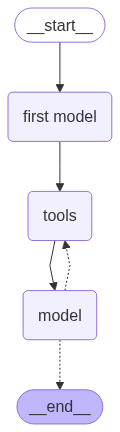

In [ ]:
import ast 
from uuid import uuid4
from typing import Annotated, TypedDict

from langchain_community.tools import DuckDuckGoSearchRun
from langchain_core.messages import HumanMessage, AIMessage, ToolCall
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from langgraph.graph import START, StateGraph
from langgraph.graph.message import add_messages # reducer function
# ToolNode는 상태에 기록된 최신 AI messages에서 요청된 tool를 실행한 후 각 호출 결과를 담은 ToolMessages를 반환 
from langgraph.prebuilt import ToolNode, tools_condition
from dotenv import load_dotenv

load_dotenv("../../.env")

@tool
def calculator(query: str) -> str:
    '''계산기. 수식만 입력받음'''
    return ast.literal_eval(query)

search = DuckDuckGoSearchRun() # 검색 툴 정의 
tools = [search, calculator]
model = ChatOpenAI(
    model = 'gpt-4o-mini',
    temperature = 0.1
).bind_tools(tools) 

class State(TypedDict):
    messages: Annotated[list, add_messages]
    
def model_node(state: State) -> State:
    res = model.invoke(state['messages'])
    return {'messages': res}

def first_model(state: State) -> State:
    query = state['messages'][-1].content
    search_tool_call = ToolCall(
        name = 'duckduckgo_search', args = {'query': query}, id = uuid4().hex
    )
    return {"messages": AIMessage(content='', tool_calls = [search_tool_call])}

builder = StateGraph(State)
builder.add_node('first model', first_model) # 첫 번째 호출은 항상 search_tool을 활용한 first_model이 처리함 
builder.add_node('model', model_node)
builder.add_node('tools', ToolNode(tools)) # ToolNode 자체적으로 예외를 처리 
builder.add_edge(START, 'first model')
builder.add_edge('first model', 'tools')
# 최신 AI Messages에서 사용된 Tools를 확인해보고 존재하면 tools 노드로 연결하는 조건부 엣지 함수 
builder.add_conditional_edges('model', tools_condition) 
builder.add_edge('tools', 'model')

graph = builder.compile()
graph

In [6]:
input = {
    'messages': [
        HumanMessage(
            '미국의 제30대 대통령이 사망했을 때 몇 살이었나요?'
        )
    ]
}

for c in graph.stream(input):
    print(c)

{'first model': {'messages': AIMessage(content='', additional_kwargs={}, response_metadata={}, id='57c3eff7-a357-433b-a732-4d453b93ee17', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': '미국의 제30대 대통령이 사망했을 때 몇 살이었나요?'}, 'id': '3c3e0fb73c4744e0afc8f45e2764fe33', 'type': 'tool_call'}])}}
{'tools': {'messages': [ToolMessage(content='Apr 18, 2020 · Windows10でディスプレイを2画面に設定する（デュアルディスプレイ・マルチモニター）方法を紹介します。 資料の比較をしたり、たくさんのフォルダーやファイルを開く必要がある場合などにとても便利です。 May 29, 2023 · 本記事では、Windows11におけるデュアルディスプレイの概要や設定、使い方の基本について解説しています。 Jul 5, 2021 · モニターを2つ使えば、表示範囲がグッと広がり、作業性もかなり向上します。 今回は2つのディスプレイ（マルチディスプレイ）を使用する方法を紹介します！ ノートPC+モニター1台、デスクトップPC+モニター2台など、 2画面 で映像表示する方法です。 導入検討されている方は、 こちら もご確認ください。 Sep 12, 2023 · 1台のパソコンに2台のディスプレイをつなげて使う「デュアルディスプレイ」の設定方法や便利な使い方をご紹介します。', name='duckduckgo_search', id='4c8cd7a7-c247-4422-8141-2d81d7645bb8', tool_call_id='3c3e0fb73c4744e0afc8f45e2764fe33')]}}


c:\Users\user\anaconda3\envs\ragenv\lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'model': {'messages': AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Vjd9M7wRB1sWSSZa7V7C0Icc', 'function': {'arguments': '{"query":"Calvin Coolidge 사망 나이"}', 'name': 'duckduckgo_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 447, 'total_tokens': 471, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BzGvkCrjUWMDBr1OpkuB4X7Y9hi9U', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--64c14a8d-3467-440f-8853-fe90aadab90c-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Calvin Coolidge 사망 나이'}, 'id': 'call_Vjd9M7wRB1sWSSZa7V7C0Icc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 447, 

c:\Users\user\anaconda3\envs\ragenv\lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'model': {'messages': AIMessage(content='미국의 제30대 대통령인 캘빈 쿨리지는 1872년 7월 4일에 태어나 1933년 1월 5일에 사망했습니다. 그가 사망했을 때의 나이는 60세였습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 60, 'prompt_tokens': 766, 'total_tokens': 826, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BzGvlb7mNyz8JJgGiOzFG8D4VGNuw', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--db2a2928-aa1c-4355-847a-3a7c938e1968-0', usage_metadata={'input_tokens': 766, 'output_tokens': 60, 'total_tokens': 826, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})}}


### 복수 툴 호출 

- LLM은 프롬프트에서 여러 선택지나 과도한 정보가 주어질 경우, 더욱 어려움을 겪는다. 툴이 10개 이상 제공될 경우 LLM의 계획 성능이 저하되는 경향이 관찰되었다. 
- 이에 훌륭한 대안은 RAG 단계를 활용하여 현재 쿼리에 가장 적합한 툴을 미리 선별한 후, 전체 툴 집합 대신 선별된 툴만 LLM에 전달하여 LLM의 호출비용을 줄일 수 있다. 반면 해당 RAG 단계는 애플리케이션에 추가 지연을 초래하므로, 추가 툴 도입 후 성능 저하가 관찰될 때에만 적용하는 편이 바람직하다.


In [ ]:
import ast 
from uuid import uuid4
from typing import Annotated, TypedDict

from langchain_community.tools import DuckDuckGoSearchRun
from langchain_core.messages import HumanMessage, AIMessage, ToolCall
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_core.documents import Document

from langgraph.graph import START, StateGraph
from langgraph.graph.message import add_messages # reducer function
# ToolNode는 상태에 기록된 최신 AI messages에서 요청된 tool를 실행한 후 각 호출 결과를 담은 ToolMessages를 반환 
from langgraph.prebuilt import ToolNode, tools_condition
from dotenv import load_dotenv

load_dotenv("../../.env")

@tool
def calculator(query: str) -> str:
    '''계산기. 수식만 입력받음'''
    return ast.literal_eval(query)

search = DuckDuckGoSearchRun() # 검색 툴 정의 
tools = [search, calculator]

embeddings = OpenAIEmbeddings()
model = ChatOpenAI(
    model = 'gpt-4o-mini',
    temperature = 0.1
).bind_tools(tools) 

# 검색기 생성 
tools_retriever = InMemoryVectorStore.from_documents(
    [Document(tool.description, metadata = {'name': tool.name}) for tool in tools],
    embeddings,
).as_retriever()


In [8]:
class State(TypedDict):
    messages: Annotated[list, add_messages]
    selected_tools: list[str]

# model_node 로직 수정 
def model_node(state: State) -> State:
    selected_tools = [tool for tool in tools if tool.name in state['selected_tools']]
    res = model.bind_tools(selected_tools).invoke(state['messgaes'])
    return {'messages': res}

def select_tools(state: State) -> State:
    query = state['messages'][-1].content
    tool_docs = tools_retriever.invoke(query)
    return {"selected_tools": [doc.metadata['name'] for doc in tool_docs]}

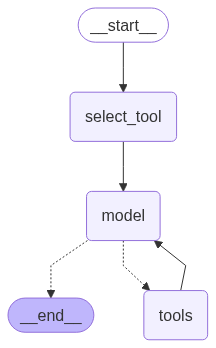

In [9]:
builder = StateGraph(State)
builder.add_node('select_tool', select_tools) # 첫 번째 호출은 항상 search_tool을 활용한 first_model이 처리함 
builder.add_node('model', model_node)
builder.add_node('tools', ToolNode(tools)) # ToolNode 자체적으로 예외를 처리 
builder.add_edge(START, 'select_tool')
builder.add_edge('select_tool', 'model')
# 최신 AI Messages에서 사용된 Tools를 확인해보고 존재하면 tools 노드로 연결하는 조건부 엣지 함수 
builder.add_conditional_edges('model', tools_condition) 
builder.add_edge('tools', 'model')

graph = builder.compile()
graph